In [ ]:
# Install the necessary packages
!pip install pandas
!pip install pandas-datareader
!pip install matplotlib
!pip install numpy
!pip install yfinance

In [ ]:
# Importing the mplfinance module
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install --upgrade mplfinance

In [ ]:
!pip list

In [1]:
# Importing the necessary modules
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override() # <== that's all it takes :-)

In [2]:
# Defining the Time Frame
start = dt.datetime(2023,1,1)
end = dt.datetime.now()

In [3]:
# Loadind the stock data
ticker = 'META'
data = yf.download(ticker, start, end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100
...,...,...,...,...,...,...
2023-12-18,337.480011,347.559998,337.019989,344.619995,344.619995,18993900
2023-12-19,345.579987,353.600006,345.119995,350.359985,350.359985,17729400
2023-12-20,348.649994,354.959991,347.790009,349.279999,349.279999,16369900


In [4]:
# Checking the column headers
data.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [5]:
# Restructuring the data
needed_data = data[['Open', 'High', 'Low', 'Close']]
needed_data

,Open,High,Low,Close
Date,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998
2023-01-04,127.379997,129.050003,125.849998,127.370003
2023-01-05,126.129997,128.520004,124.540001,126.940002
2023-01-06,128.970001,130.330002,126.040001,130.020004
2023-01-09,131.160004,132.949997,129.279999,129.470001
...,...,...,...,...
2023-12-18,337.480011,347.559998,337.019989,344.619995
2023-12-19,345.579987,353.600006,345.119995,350.359985
2023-12-20,348.649994,354.959991,347.790009,349.279999


In [6]:
# Resetting the index column
needed_data.reset_index(inplace=True)
needed_data

,Date,Open,High,Low,Close
0,2023-01-03,122.820000,126.370003,122.279999,124.739998
1,2023-01-04,127.379997,129.050003,125.849998,127.370003
2,2023-01-05,126.129997,128.520004,124.540001,126.940002
3,2023-01-06,128.970001,130.330002,126.040001,130.020004
4,2023-01-09,131.160004,132.949997,129.279999,129.470001
...,...,...,...,...,...
241,2023-12-18,337.480011,347.559998,337.019989,344.619995
242,2023-12-19,345.579987,353.600006,345.119995,350.359985
243,2023-12-20,348.649994,354.959991,347.790009,349.279999
244,2023-12-21,352.980011,356.410004,349.209991,354.089996


In [7]:
# Reformatting the date column
needed_data.loc[:,'Date'] = needed_data["Date"].map(mdates.date2num)
needed_data

,Date,Open,High,Low,Close
0,19360.0,122.820000,126.370003,122.279999,124.739998
1,19361.0,127.379997,129.050003,125.849998,127.370003
2,19362.0,126.129997,128.520004,124.540001,126.940002
3,19363.0,128.970001,130.330002,126.040001,130.020004
4,19366.0,131.160004,132.949997,129.279999,129.470001
...,...,...,...,...,...
241,19709.0,337.480011,347.559998,337.019989,344.619995
242,19710.0,345.579987,353.600006,345.119995,350.359985
243,19711.0,348.649994,354.959991,347.790009,349.279999
244,19712.0,352.980011,356.410004,349.209991,354.089996


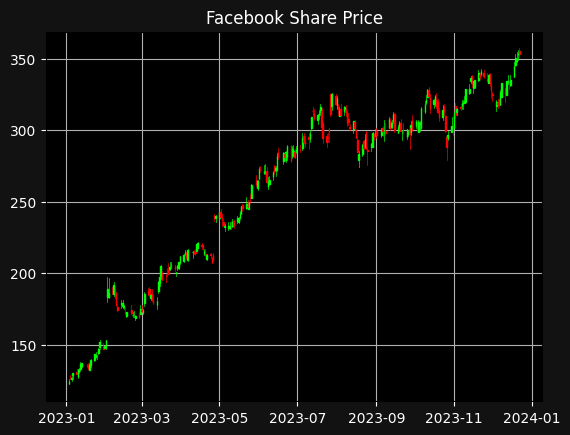

In [8]:
# Visualization
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('Facebook Share Price', color='white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.xaxis_date()
candlestick_ohlc(ax, needed_data.values, width=0.5, colorup='#00ff00')
plt.show()

In [9]:
# Using the mpl colour schemes
colors = mpf.make_marketcolors()
colors

{'candle': {'up': 'w', 'down': 'k'},
 'edge': {'up': 'k', 'down': 'k'},
 'wick': {'up': 'k', 'down': 'k'},
 'ohlc': {'up': 'k', 'down': 'k'},
 'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
 'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
 'vcdopcod': False,
 'alpha': 0.9}

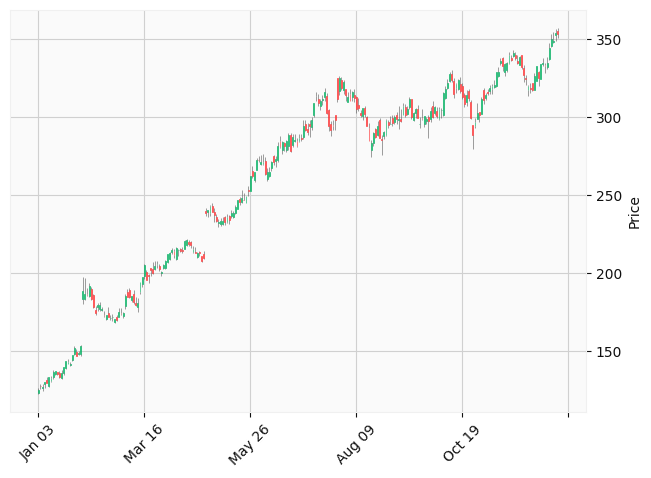

In [10]:
# plotting common graphs
mpf.plot(data, type='candle', style='yahoo')

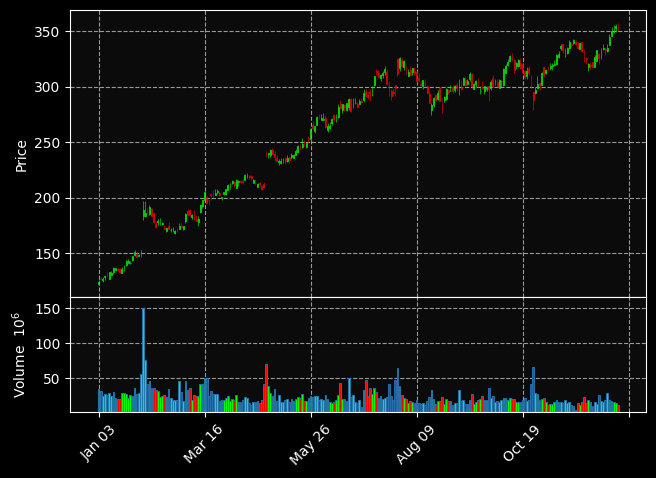

In [11]:
# Customizing the Charts
colors = mpf.make_marketcolors(
    up="#00ff00",
    down="#ff0000",
    wick="inherit",
    edge="inherit",
    volume="in")
mpf_style = mpf.make_mpf_style(base_mpf_style='nightclouds', marketcolors=colors)
mpf.plot(data, type="candle", style=mpf_style, volume=True)
